In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
df_raw = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
df_proc = df_raw.copy()
df_proc['Date'] = pd.to_datetime(df_proc['Date'])
df_proc = df_proc.dropna()
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    56420

In [4]:
df_proc.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
78430,2010-03-18,Watsonia,19.1,32.5,0.0,8.0,2.2,N,39.0,ENE,...,69.0,30.0,1023.2,1020.0,7.0,7.0,20.2,31.0,No,No
95600,2015-07-07,Townsville,13.7,26.4,0.0,5.6,10.2,ENE,30.0,SSE,...,71.0,41.0,1018.4,1014.7,1.0,1.0,21.4,25.8,No,No
23357,2015-05-17,NorfolkIsland,16.8,20.9,0.2,5.8,5.4,SE,43.0,SE,...,74.0,80.0,1026.5,1025.2,7.0,6.0,18.3,18.1,No,No
121509,2010-11-19,Perth,23.0,38.8,0.0,13.8,8.7,NE,43.0,NE,...,16.0,18.0,1012.7,1010.0,3.0,7.0,31.6,34.5,No,No
123728,2017-03-15,Perth,16.6,24.0,1.6,5.8,10.6,SW,35.0,S,...,59.0,39.0,1019.3,1017.9,4.0,1.0,18.6,22.5,Yes,No
38538,2014-09-30,WaggaWagga,6.0,25.9,0.0,4.4,11.1,SW,74.0,NE,...,59.0,16.0,1014.2,1009.2,1.0,1.0,16.7,25.7,No,No
32767,2015-06-04,Sydney,7.4,19.0,0.0,1.2,9.0,W,33.0,WNW,...,82.0,53.0,1022.0,1017.8,3.0,2.0,8.9,17.5,No,No
33031,2016-02-23,Sydney,21.8,29.7,0.0,9.4,12.4,NNE,43.0,N,...,62.0,51.0,1021.3,1017.7,1.0,1.0,25.4,28.2,No,No
84092,2008-09-24,Brisbane,16.7,22.5,0.0,6.8,1.2,SSE,44.0,S,...,73.0,58.0,1022.7,1021.7,7.0,7.0,19.6,21.1,No,No
107195,2013-09-19,Woomera,6.6,24.9,0.0,8.2,11.3,W,50.0,N,...,44.0,13.0,1014.0,1010.6,0.0,0.0,15.5,23.7,No,No


In [5]:
X_total = df_proc.drop(['RainTomorrow'], axis=1)
#X_total_numerical = X_total.select_dtypes(['number'])
ohencoder = OneHotEncoder(sparse_output = False)
X_total_transformed = ohencoder.fit_transform(X_total.select_dtypes('object'))
y_total = df_proc['RainTomorrow']
X_train, X_test, y_train, y_test = \
    train_test_split(X_total_transformed, y_total, test_size=0.33, random_state = 2025)

In [6]:
def run_and_test_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_pred = pd.Series(y_test_pred)

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix: '+model_name)
    plt.show()

    accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    precision = precision_score(y_test, y_test_pred, pos_label='Yes')
    print(f'Precision_score: {precision:.4f}')
    
    recall = recall_score(y_test, y_test_pred, pos_label='Yes')
    print(f'Recall Score: {recall:.4f}')
    
    f1 = f1_score(y_test, y_test_pred, average='macro')
    print(f'F1 Score: {f1:.4f}')
    
    fpr, tpr, _ = roc_curve(y_test=='Yes', y_test_pred=='Yes')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC: '+model_name)
    plt.show()

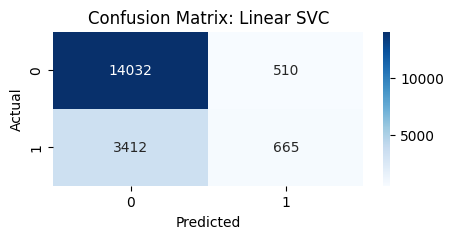

Accuracy: 0.7894
Precision_score: 0.5660
Recall Score: 0.1631
F1 Score: 0.5653


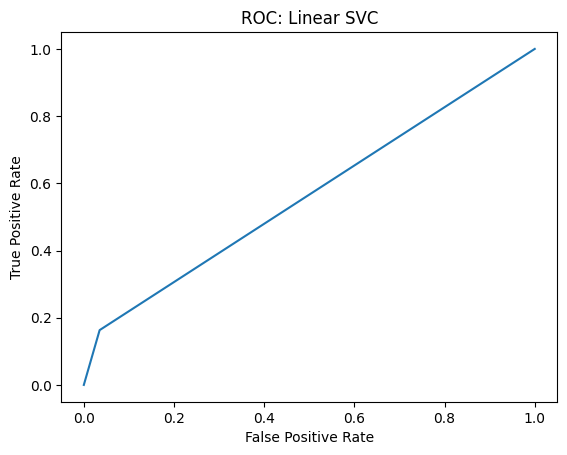

In [7]:
LSVC_model = LinearSVC(max_iter = 1_000)
run_and_test_model(LSVC_model, "Linear SVC", X_train, X_test, y_train, y_test)


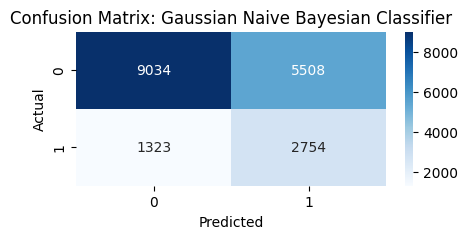

Accuracy: 0.6331
Precision_score: 0.3333
Recall Score: 0.6755
F1 Score: 0.5860


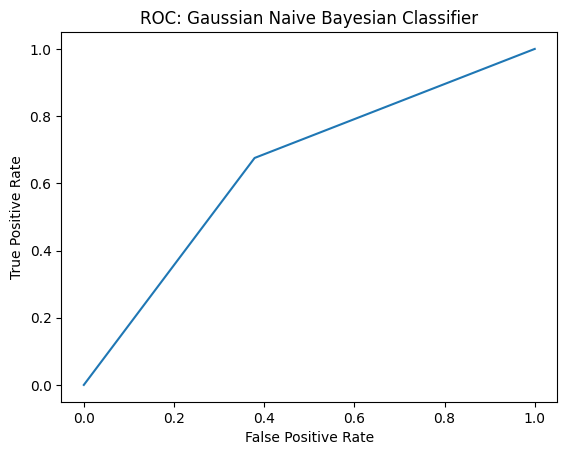

In [8]:
from sklearn.naive_bayes import GaussianNB
GaussianNBClassifier = GaussianNB()
run_and_test_model(GaussianNBClassifier, "Gaussian Naive Bayesian Classifier", X_train, X_test, y_train, y_test)

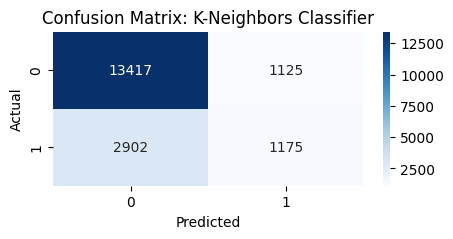

Accuracy: 0.7837
Precision_score: 0.5109
Recall Score: 0.2882
F1 Score: 0.6190


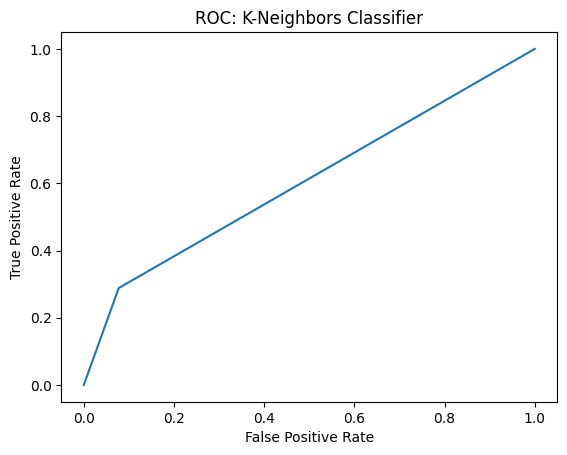

In [9]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier_model = KNeighborsClassifier(n_neighbors = 5)
run_and_test_model(KNeighborsClassifier_model, "K-Neighbors Classifier", X_train, X_test, y_train, y_test)

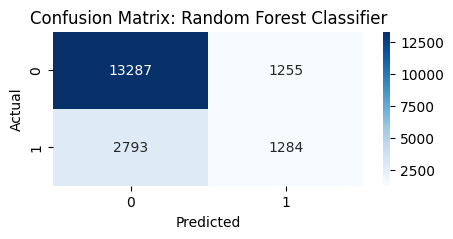

Accuracy: 0.7826
Precision_score: 0.5057
Recall Score: 0.3149
F1 Score: 0.6280


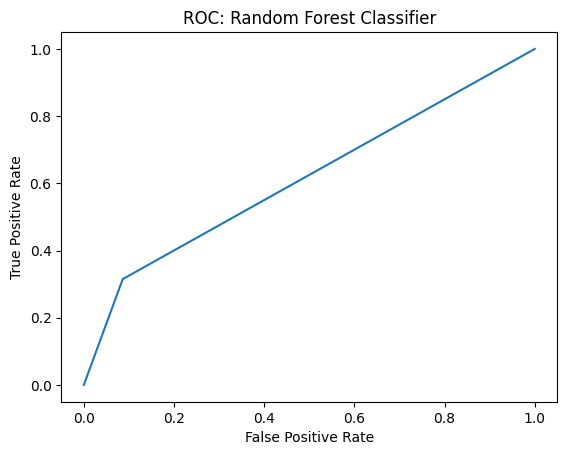

In [10]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier_model = RandomForestClassifier()
run_and_test_model(RandomForestClassifier_model, "Random Forest Classifier", X_train, X_test, y_train, y_test)

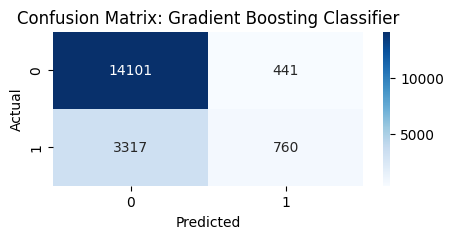

Accuracy: 0.7982
Precision_score: 0.6328
Recall Score: 0.1864
F1 Score: 0.5852


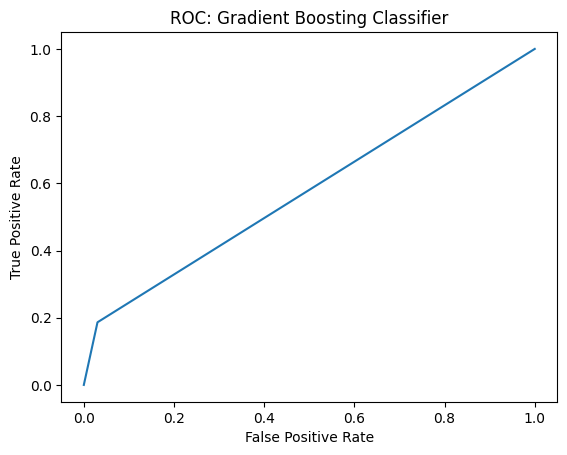

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier_model = GradientBoostingClassifier()
run_and_test_model(GradientBoostingClassifier_model, "Gradient Boosting Classifier", X_train, X_test, y_train, y_test)

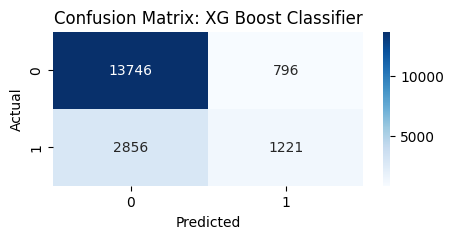

Accuracy: 0.8039
Precision_score: 0.6054
Recall Score: 0.2995
F1 Score: 0.6417


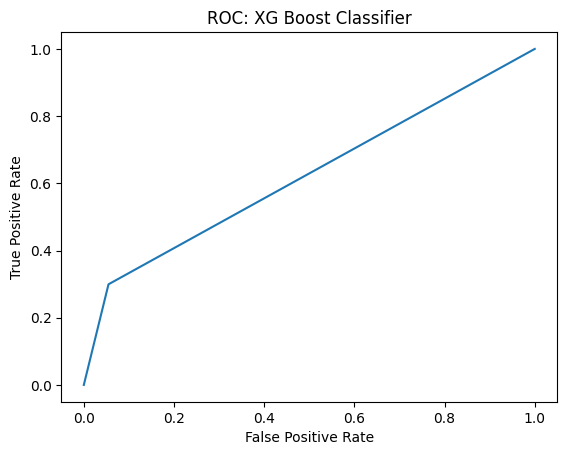

In [12]:
def xgboost_run_and_test_model(model, model_name, X_train, X_test, y_train, y_test):
    y_train = y_train.map(dict(Yes=1, No=0))
    y_test = y_test.map(dict(Yes=1, No=0))
    
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_pred = pd.Series(y_test_pred)
    #print(y_test_pred)    

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix: '+model_name)
    plt.show()

    accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    precision = precision_score(y_test, y_test_pred)
    print(f'Precision_score: {precision:.4f}')
    
    recall = recall_score(y_test, y_test_pred)
    print(f'Recall Score: {recall:.4f}')
    
    f1 = f1_score(y_test, y_test_pred, average='macro')
    print(f'F1 Score: {f1:.4f}')
    
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC: '+model_name)
    plt.show()

from xgboost import XGBClassifier
XGBClassifier_model = XGBClassifier(tree_method="hist", enable_categorical=True, device="cpu")
xgboost_run_and_test_model(XGBClassifier_model, "XG Boost Classifier", X_train, X_test, y_train, y_test)
